In [77]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import os
path = '/mnt/c/Users/alon4/Dropbox/My PC (LAPTOP-L5MMEHHN)/Desktop/Studies/Lab C1/Molecular Spectroscopy'
files = ['NEXT Cigar.xlsx', 'Marlborro Cigar (1).xlsx', 'LM Cigar 00.xlsx', 'Galuois Cigar (1).xlsx', 'Canadian Cigar.xlsx']
cigars = [file.split(' ')[0] for file in files]
files = [os.path.join(path,'Measurements/Cigar/'+f) for f in files]
def readXlsx(path):
    return pd.read_excel(path).to_numpy().T
plt.rcParams['figure.figsize'] = [10,7.5]
plt.rcParams.update({'font.size': 18, 'font.weight':'bold'})
plt.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [78]:
CO = ('CO',np.array([[2028,2238]]),'orchid')
CO2 = (r'$\text{CO}_{\text{2}}$', np.array([[2248,2402],[604,705],[717,724]]),'mediumseagreen')
HCN = ('HCN', np.array([[710,716]]),'purple')
METHANOL = ('Methanol', np.array([[1000,1080]]),'saddlebrown')
ETHYLENE = ('Ethylene', np.array([[901,997]]),'grey')
ISOPRENE = ('Isoprene', np.array([[889,897]]),'red')
METHANE = ('Methane', np.array([[1300,1307],[2820,3200]]),'green')
ACETALDEHYDE = ('Acetaldehyde', np.array([[1720,1780]]),'black')
H2O = ('Water', np.array([[1325,1994]]),'blue')
chomers = [CO,CO2,HCN,METHANOL,ETHYLENE,ISOPRENE,METHANE,ACETALDEHYDE,H2O]
regions = [[0,550],[550,1999.5] ,[1999.61349,4000]]
names = ['Noise','Diverse','CO-CO2']

NEXT


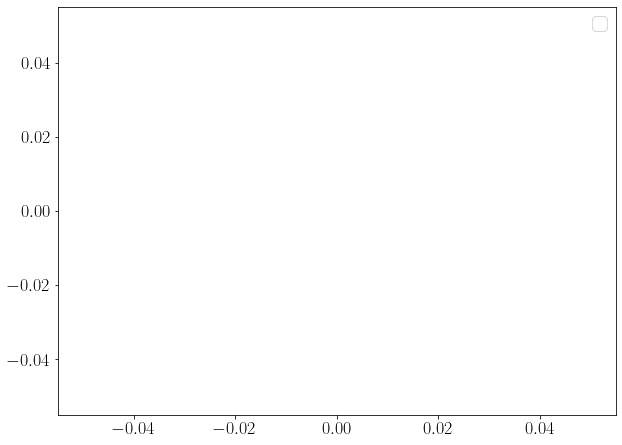

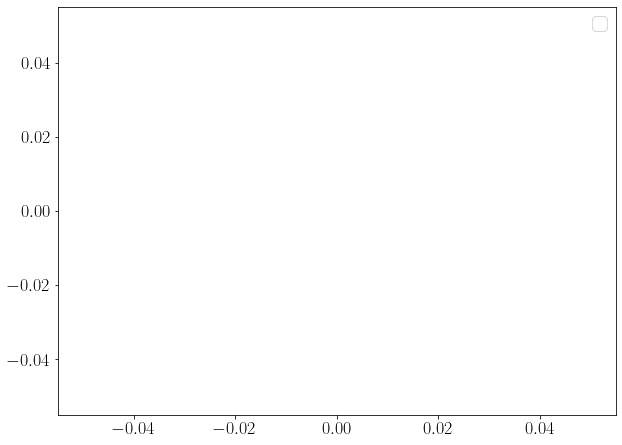

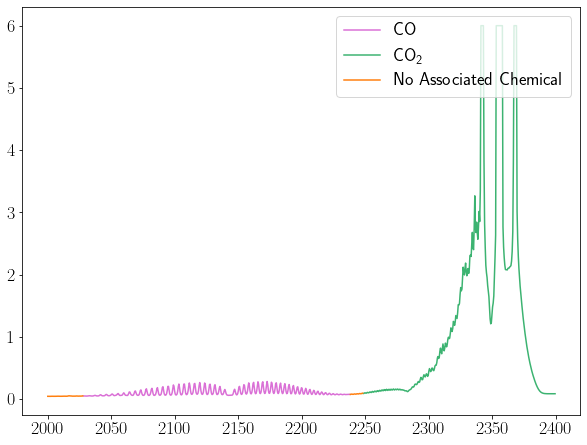

Marlborro


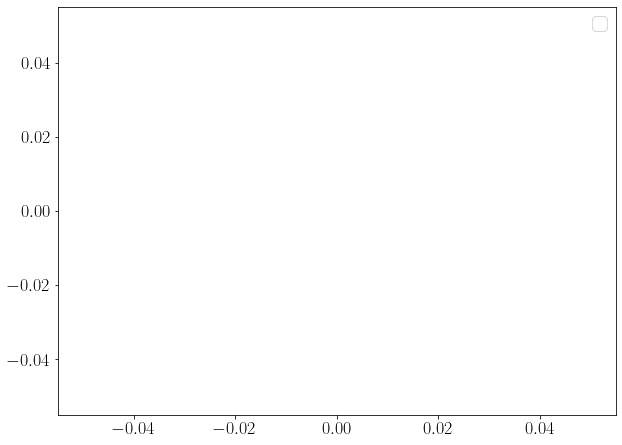

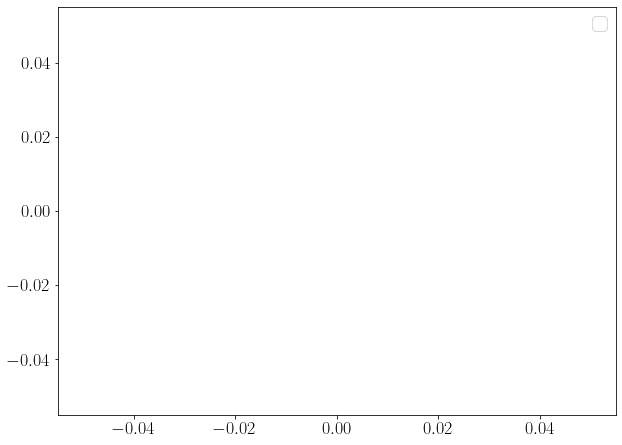

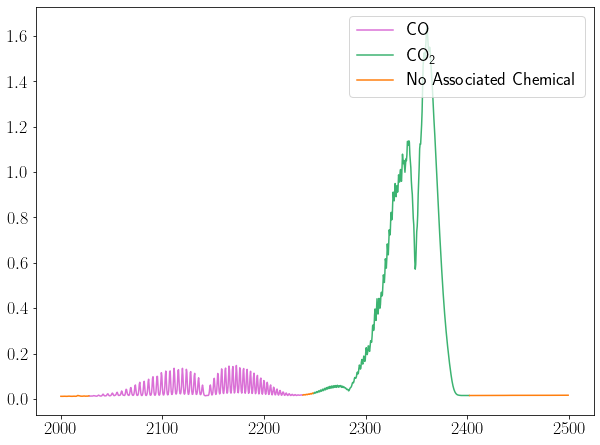

LM


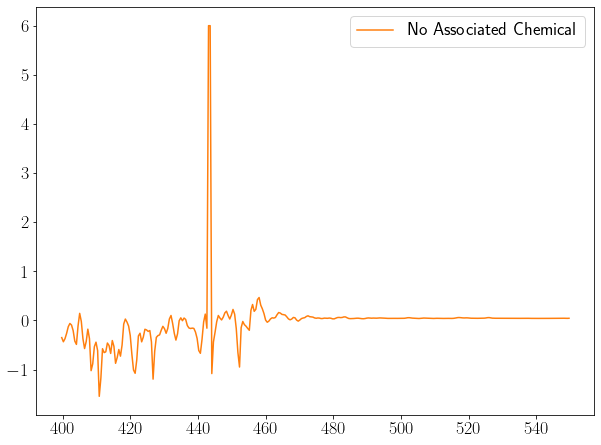

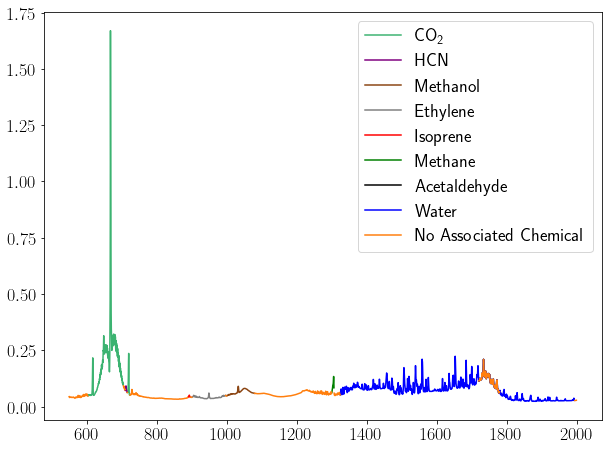

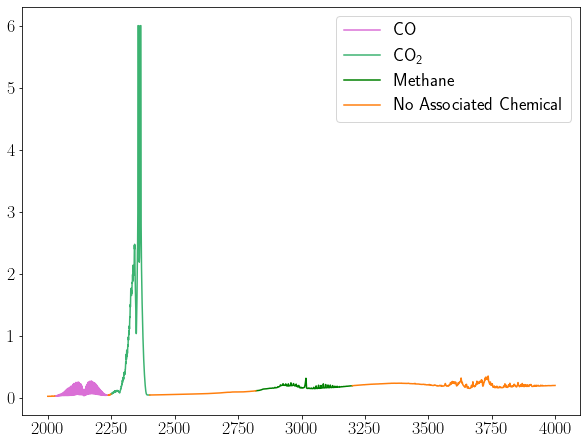

Galuois


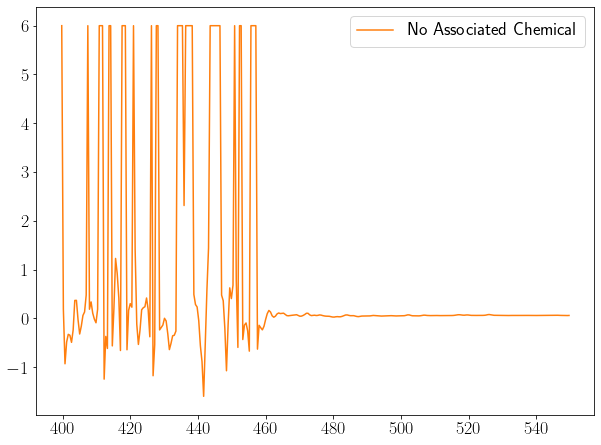

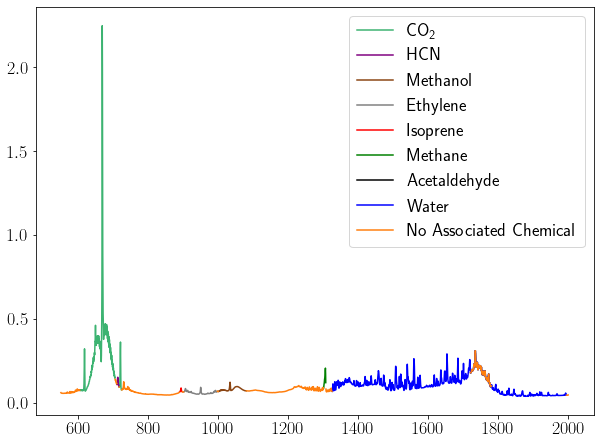

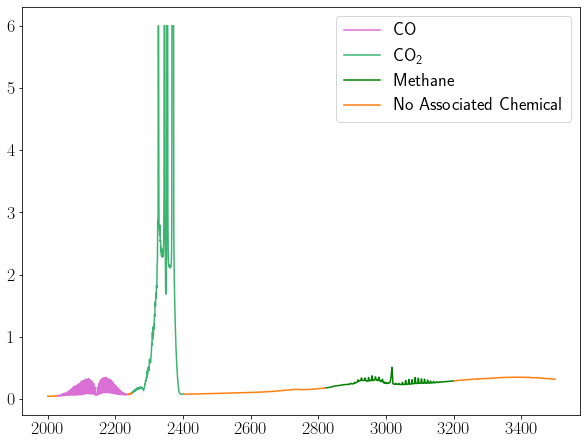

Canadian


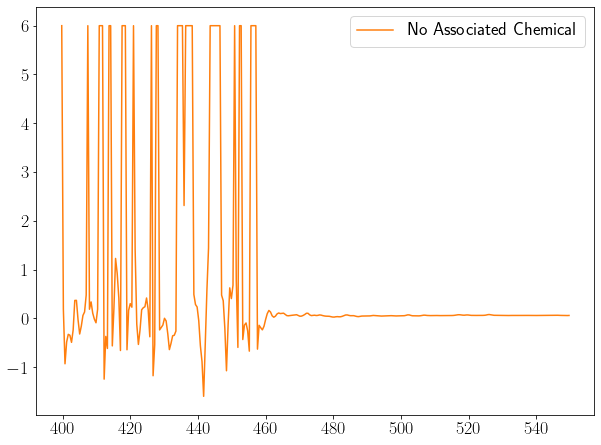

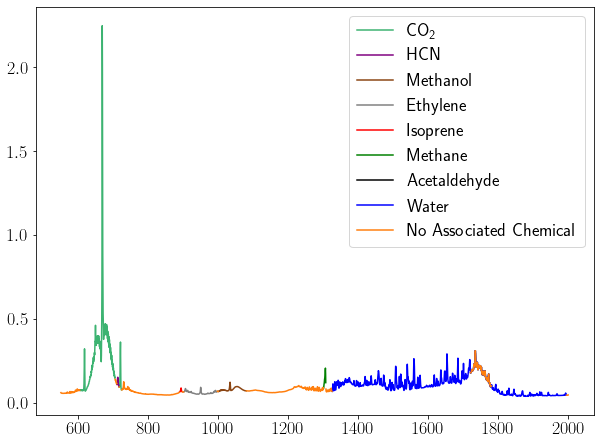

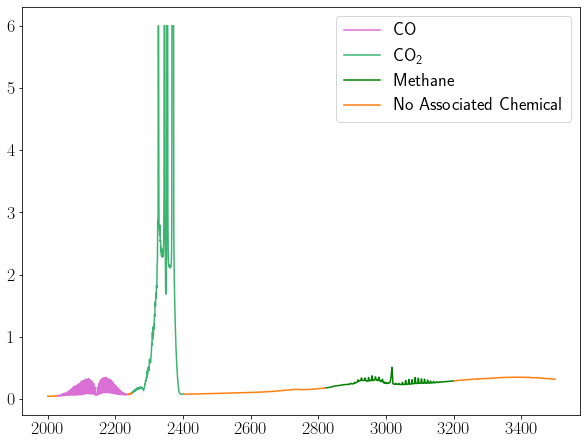

In [79]:
for i in range(len(files)):
    print(cigars[i])
    spectrum_full = readXlsx(files[i]) # [[Wavenumber], [Absorbance]]
    for k in range(len(regions)):
        mask = ((spectrum_full[0] > regions[k][0]) & (spectrum_full[0] < regions[k][1]))
        spectrum = spectrum_full[:,mask]
        sumMask = np.zeros_like(spectrum[0])
        plots=[]
        labels = []
        for chem in chomers:
            masks = [np.ma.masked_inside(spectrum[0],*reg).mask for reg in chem[1]]
            for mask in masks:
                sumMask += mask
                if np.sum(mask) > 1 and chem[0] not in labels:
                    labels.append(chem[0])
                    curves, = plt.plot(spectrum[0][mask],spectrum[1][mask],color=chem[2])
                    plots.append(curves)
                else:
                    plt.plot(spectrum[0][mask],spectrum[1][mask],color=chem[2])

        sumMask = 1-sumMask
        sumMask = sumMask.astype(bool)
        masks = []
        start = 0
        j=0
        while j<len(sumMask):
            if sumMask[j]:
                start = j
                while j<len(sumMask) and sumMask[j]:
                    j+=1
                masks.append([start,j-1])
            j+=1
        for mask in masks:
            if 'No Associated Chemical' not in labels:
                curves, = plt.plot(spectrum[0][mask[0]:mask[1]+1],spectrum[1][mask[0]:mask[1]+1], color = 'tab:orange')
                plots.append(curves)
                labels.append('No Associated Chemical')
            else:
                plt.plot(spectrum[0][mask[0]:mask[1]+1],spectrum[1][mask[0]:mask[1]+1], color = 'tab:orange')

        plt.legend(plots, labels, loc='upper right')
        plt.savefig(os.path.join(path, f"Analysis/Colored Cigar Spectrums/{cigars[i]}_{names[k]}_Spectrum.png"))
        plt.show()